In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
data_df = pd.read_csv('Dataset.csv')

In [3]:
# Explore the first few rows of the dataset
data_df.head()

,Age,Gender,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Total Score,Label
0,38,Male,0,0,0,0,0,0,0,0,0,0,Minimal Depression
1,51,Male,0,0,0,0,0,0,0,0,1,1,Minimal Depression
2,46,Female,0,0,0,0,0,0,0,1,0,1,Minimal Depression
3,56,Male,0,0,0,0,0,0,1,0,0,1,Minimal Depression
4,43,Female,0,0,0,0,0,1,0,0,0,1,Minimal Depression


In [4]:
# Summary statistics for numerical columns
print(data_df.describe())

                 Age     Question 1     Question 2     Question 3  \
count  524294.000000  524294.000000  524294.000000  524294.000000   
mean       41.481989       1.500017       1.500017       1.500017   
std        13.852532       1.118040       1.118040       1.118040   
min        18.000000       0.000000       0.000000       0.000000   
25%        29.000000       1.000000       1.000000       1.000000   
50%        41.000000       2.000000       2.000000       2.000000   
75%        54.000000       3.000000       3.000000       3.000000   
max        65.000000       3.000000       3.000000       3.000000   

          Question 4     Question 5     Question 6     Question 7  \
count  524294.000000  524294.000000  524294.000000  524294.000000   
mean        1.500017       1.500017       1.500017       1.500017   
std         1.118040       1.118040       1.118040       1.118040   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.0000

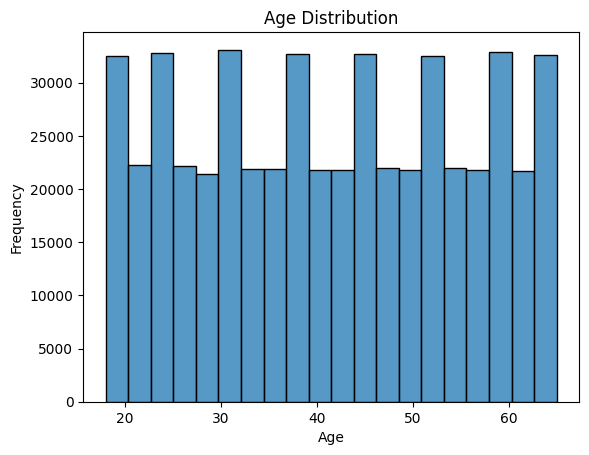

In [5]:
# Distribution of the 'Age' column
sns.histplot(data_df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

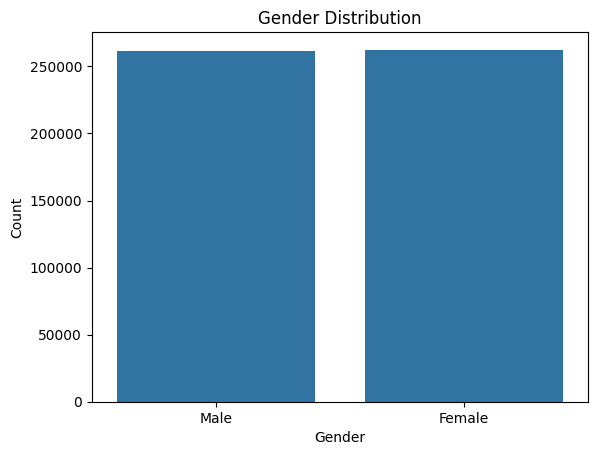

In [6]:
# Gender distribution
sns.countplot(data=data_df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

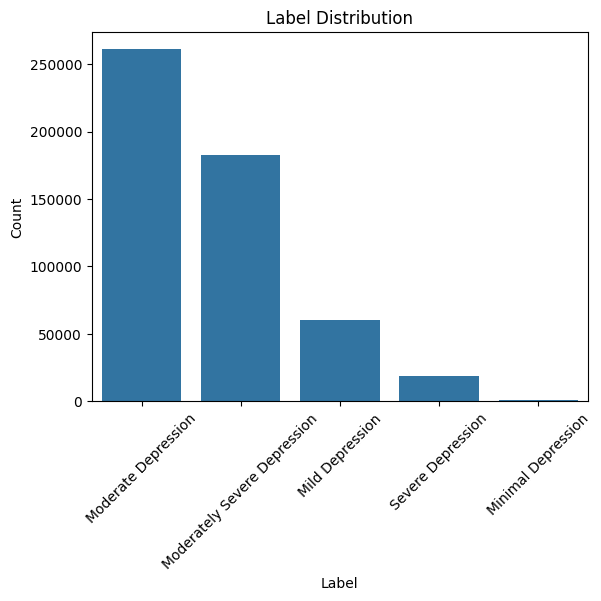

In [7]:
# Distribution of the 'Label' column
sns.countplot(data=data_df, x='Label', order=data_df['Label'].value_counts().index)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Define label mapping
label_mapping = {
    0: "Minimal Depression",
    1: "Mild Depression",
    2: "Moderate Depression",
    3: "Moderately Severe Depression",
    4: "Severe Depression",
}

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Gender' and 'Label' columns
data_df['Gender'] = label_encoder.fit_transform(data_df['Gender'])
data_df['Label'] = label_encoder.fit_transform(data_df['Label'])

In [10]:
data_df

,Age,Gender,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Total Score,Label
0,38,1,0,0,0,0,0,0,0,0,0,0,1
1,51,1,0,0,0,0,0,0,0,0,1,1,1
2,46,0,0,0,0,0,0,0,0,1,0,1,1
3,56,1,0,0,0,0,0,0,1,0,0,1,1
4,43,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524289,25,1,3,3,3,3,3,3,3,3,2,26,4
524290,28,0,3,3,3,3,3,3,3,3,3,27,4
524291,28,0,3,3,3,3,3,3,3,3,3,27,4
524292,28,0,3,3,3,3,3,3,3,3,3,27,4


In [11]:
# Split data into features (X) and labels (y)
X = data_df.drop(['Label'], axis=1)
y = data_df['Label']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create and train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Predict labels on the test set
y_pred = classifier.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_mapping.values())

In [17]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
                               precision    recall  f1-score   support

          Minimal Depression       1.00      1.00      1.00     11832
             Mild Depression       1.00      1.00      1.00       289
         Moderate Depression       1.00      1.00      1.00     52175
Moderately Severe Depression       1.00      1.00      1.00     36811
           Severe Depression       1.00      1.00      1.00      3752

                    accuracy                           1.00    104859
                   macro avg       1.00      1.00      1.00    104859
                weighted avg       1.00      1.00      1.00    104859



In [18]:
# Data analysis
average_age = data_df['Age'].mean()
age_range = (data_df['Age'].min(), data_df['Age'].max())
gender_distribution = data_df['Gender'].value_counts()

In [19]:
print(f"Average Age: {average_age}")
print(f"Age Range: {age_range}")
print("Gender Distribution:\n", gender_distribution)

Average Age: 41.481989112978596
Age Range: (18, 65)
Gender Distribution:
 Gender
0    262446
1    261848
Name: count, dtype: int64


In [20]:
import joblib

# Save the trained model (Decision Tree Classifier)
joblib.dump(classifier, 'depression_model.pkl')

['depression_model.pkl']